In [1]:
import pandas as pd
# Add Matplotlib inline magic command
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns

# Extract

In [2]:
import requests

In [3]:
# Creating a url to fetch the data from the web
url = "https://www.samhsa.gov/data/sites/default/files/reports/rpt35323/NSDUHDetailedTabs2020v25/NSDUHDetailedTabs2020v25/NSDUHDetTabsSect8pe2020.htm"

In [4]:
# Fetching the data from the web through web scraping
r = requests.get(url)

In [5]:
r

<Response [200]>

In [6]:
# Craete a dataframe to get the tables
df = pd.read_html(url)[4]
df.head(10)

,Geographic/Socioeconomic Characteristic,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020),Aged 26+(2019),Aged 26+(2020),Aged 26-49(2019),Aged 26-49(2020),Aged 50+(2019),Aged 50+(2020)
0,TOTAL,51495,52859,9930,10238,41565,42621,25279,25676,16286,16945
1,GEOGRAPHIC REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Northeast,8608,8383,1611,1677,6997,6707,3970,4160,3027,2546
3,Midwest,11497,11866,2284,2192,9213,9674,5512,6014,3701,3660
4,South,18212,18616,3544,3637,14668,14979,9317,8514,5351,6465
5,West,13178,13994,2491,2733,10686,11261,6480,6987,4207,4273
6,COUNTY TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Large Metro,28346,27213,5573,5311,22773,21902,14283,13407,8490,8495
8,Small Metro,15837,17946,3136,3555,12701,14391,7666,8826,5035,5565
9,Nonmetro,7312,7699,1222,1372,6090,6327,3330,3442,2761,2885


# Transform

In [7]:
df.drop([1], axis = 0, inplace = True)
df.head()

,Geographic/Socioeconomic Characteristic,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020),Aged 26+(2019),Aged 26+(2020),Aged 26-49(2019),Aged 26-49(2020),Aged 50+(2019),Aged 50+(2020)
0,TOTAL,51495,52859,9930,10238,41565,42621,25279,25676,16286,16945
2,Northeast,8608,8383,1611,1677,6997,6707,3970,4160,3027,2546
3,Midwest,11497,11866,2284,2192,9213,9674,5512,6014,3701,3660
4,South,18212,18616,3544,3637,14668,14979,9317,8514,5351,6465
5,West,13178,13994,2491,2733,10686,11261,6480,6987,4207,4273


In [8]:
# Find null values
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column Geographic/Socioeconomic Characteristic has 0 null values
Column Aged 18+(2019) has 4 null values
Column Aged 18+(2020) has 4 null values
Column Aged 18-25(2019) has 4 null values
Column Aged 18-25(2020) has 4 null values
Column Aged 26+(2019) has 4 null values
Column Aged 26+(2020) has 4 null values
Column Aged 26-49(2019) has 4 null values
Column Aged 26-49(2020) has 4 null values
Column Aged 50+(2019) has 4 null values
Column Aged 50+(2020) has 4 null values


In [9]:
#Checking datatype
df.dtypes


Geographic/Socioeconomic Characteristic    object
Aged 18+(2019)                             object
Aged 18+(2020)                             object
Aged 18-25(2019)                           object
Aged 18-25(2020)                           object
Aged 26+(2019)                             object
Aged 26+(2020)                             object
Aged 26-49(2019)                           object
Aged 26-49(2020)                           object
Aged 50+(2019)                             object
Aged 50+(2020)                             object
dtype: object

In [10]:
# df.set_index('Geographic/Socioeconomic Characteristic')
df.head()

,Geographic/Socioeconomic Characteristic,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020),Aged 26+(2019),Aged 26+(2020),Aged 26-49(2019),Aged 26-49(2020),Aged 50+(2019),Aged 50+(2020)
0,TOTAL,51495,52859,9930,10238,41565,42621,25279,25676,16286,16945
2,Northeast,8608,8383,1611,1677,6997,6707,3970,4160,3027,2546
3,Midwest,11497,11866,2284,2192,9213,9674,5512,6014,3701,3660
4,South,18212,18616,3544,3637,14668,14979,9317,8514,5351,6465
5,West,13178,13994,2491,2733,10686,11261,6480,6987,4207,4273


In [11]:
#Drop the Geographic/Socioeconomic Characteristic
cols = df.columns.drop('Geographic/Socioeconomic Characteristic')
cols

Index(['Aged 18+(2019)', 'Aged 18+(2020)', 'Aged 18-25(2019)',
       'Aged 18-25(2020)', 'Aged 26+(2019)', 'Aged 26+(2020)',
       'Aged 26-49(2019)', 'Aged 26-49(2020)', 'Aged 50+(2019)',
       'Aged 50+(2020)'],
      dtype='object')

In [12]:
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce').convert_dtypes() 
df.dtypes

Geographic/Socioeconomic Characteristic    object
Aged 18+(2019)                              Int64
Aged 18+(2020)                              Int64
Aged 18-25(2019)                            Int64
Aged 18-25(2020)                            Int64
Aged 26+(2019)                              Int64
Aged 26+(2020)                              Int64
Aged 26-49(2019)                            Int64
Aged 26-49(2020)                            Int64
Aged 50+(2019)                              Int64
Aged 50+(2020)                              Int64
dtype: object

In [13]:
# Drop Unnecessary age brackets
df.drop(['Aged 26+(2019)', 'Aged 26+(2020)', 'Aged 26-49(2019)', 'Aged 26-49(2020)', 'Aged 50+(2019)', 'Aged 50+(2020)'], axis = 1, inplace = True)
df.head()

,Geographic/Socioeconomic Characteristic,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020)
0,TOTAL,51495,52859,9930,10238
2,Northeast,8608,8383,1611,1677
3,Midwest,11497,11866,2284,2192
4,South,18212,18616,3544,3637
5,West,13178,13994,2491,2733


In [14]:
df.head()

,Geographic/Socioeconomic Characteristic,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020)
0,TOTAL,51495,52859,9930,10238
2,Northeast,8608,8383,1611,1677
3,Midwest,11497,11866,2284,2192
4,South,18212,18616,3544,3637
5,West,13178,13994,2491,2733


In [15]:
df = df.set_index('Geographic/Socioeconomic Characteristic')
df.head()

,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020)
Geographic/Socioeconomic Characteristic,,,,
TOTAL,51495,52859,9930,10238
Northeast,8608,8383,1611,1677
Midwest,11497,11866,2284,2192
South,18212,18616,3544,3637
West,13178,13994,2491,2733


In [16]:
## Function checking for missing values
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [17]:
#Print missing values
missing_values_table(df)

Your selected dataframe has 4 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Aged 18+(2019),5,18.5
Aged 18+(2020),5,18.5
Aged 18-25(2019),5,18.5
Aged 18-25(2020),5,18.5


In [18]:
# tables = pd.read_html(url)
# tables


In [19]:
#Remove last row from the dataframe
df2 = df.iloc[:-1 , :]
df2.shape

(26, 4)

In [20]:
df.dropna()

,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020)
Geographic/Socioeconomic Characteristic,,,,
TOTAL,51495,52859,9930,10238
Northeast,8608,8383,1611,1677
Midwest,11497,11866,2284,2192
South,18212,18616,3544,3637
West,13178,13994,2491,2733
Large Metro,28346,27213,5573,5311
Small Metro,15837,17946,3136,3555
Nonmetro,7312,7699,1222,1372
Urbanized,3100,3360,596,627


In [21]:
geographic_df = df.iloc[1:5]
geographic_df

,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020)
Geographic/Socioeconomic Characteristic,,,,
Northeast,8608,8383,1611,1677
Midwest,11497,11866,2284,2192
South,18212,18616,3544,3637
West,13178,13994,2491,2733


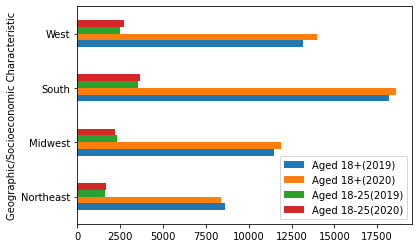

In [22]:
from matplotlib import figure
geographic_df.plot.barh()
plt.savefig("Resources/Regional_Ami.jpg")

In [23]:
# Converting specific column to Series
series = geographic_df.iloc[:,1]
series

Geographic/Socioeconomic Characteristic
Northeast     8383
Midwest      11866
South        18616
West         13994
Name: Aged 18+(2020), dtype: Int64

In [24]:
education_df = df.iloc[17:21]
education_df

,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020)
Geographic/Socioeconomic Characteristic,,,,
< High School,5505,5552,1107,933
High School Graduate,11705,13170,2839,2794
Some College/Associate‘s Degree,18250,18339,4584,4662
College Graduate,16034,15798,1400,1850


<AxesSubplot:xlabel='Geographic/Socioeconomic Characteristic'>

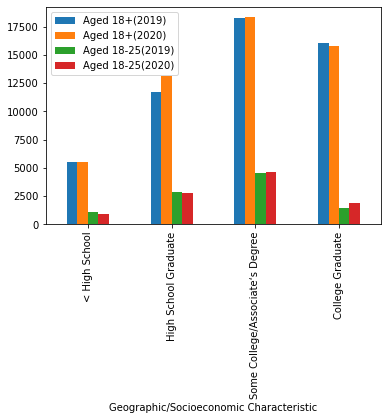

In [25]:
from matplotlib import figure
education_df.plot.bar()

/Users/uzmasyed/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<AxesSubplot:xlabel='Geographic/Socioeconomic Characteristic'>

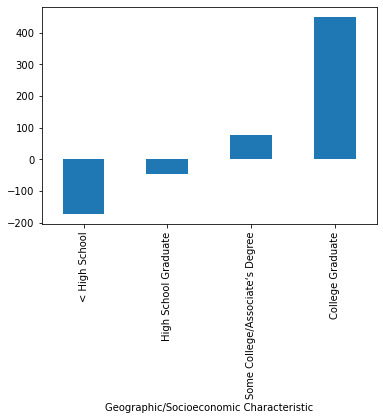

In [26]:
# Find the change in total number of cases for 2020 amongst adults 18-25
change_rate_18_25 = (education_df['Aged 18-25(2020)']-education_df['Aged 18-25(2019)'])

education_df['growth_rate'] = change_rate_18_25

education_df.sort_values(by=['growth_rate'],ascending=False)
change_rate_18_25.plot.bar()

In [27]:
# Save dataframe as a csv file 
df.to_csv('Resources/table4.csv')

<AxesSubplot:xlabel='Geographic/Socioeconomic Characteristic'>

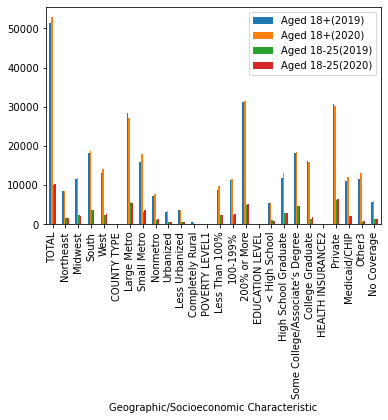

In [28]:
# Plot the dataframe for a quick overview
df2.plot.bar()

In [29]:
df3 = pd.read_csv('Resources/covid_cleaned.csv')
df3.head()

,Unnamed: 0,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
0,0,AK,76993509,0,0,263307,0,406984,0,0,1109,0
1,1,AL,495866086,372514245,123351841,1370792,388554,8946436,7052062,1894374,19781,4602
2,2,AR,314253729,0,0,871467,247126,4678130,0,0,11316,2830
3,3,AS,618133,0,0,6505,0,2546,0,0,31,0
4,4,AZ,762685906,691776565,70849280,2145765,256800,12984264,11445303,1537111,30810,3994


In [30]:
df3.set_index('state')

,Unnamed: 0,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
state,,,,,,,,,,,
AK,0,76993509,0,0,263307,0,406984,0,0,1109,0
AL,1,495866086,372514245,123351841,1370792,388554,8946436,7052062,1894374,19781,4602
AR,2,314253729,0,0,871467,247126,4678130,0,0,11316,2830
AS,3,618133,0,0,6505,0,2546,0,0,31,0
AZ,4,762685906,691776565,70849280,2145765,256800,12984264,11445303,1537111,30810,3994
CA,5,3305642241,3159478078,146164163,10035241,534865,41363286,20529490,0,91795,0
CO,6,499355370,458969735,40385635,1546422,142342,5328084,4672568,655516,12783,1509
CT,7,282636713,256463850,25991615,819915,87368,6071140,4950197,1113088,11051,2211
DC,8,48506690,0,0,157435,0,796495,0,0,1351,0


In [31]:
# Drop Unnecessary columns
df3.drop(['conf_cases', 'prob_cases', 'new_case', 'pnew_case', 'conf_death', 'prob_death', 'new_death', 'pnew_death'], axis = 1, inplace =True)
df3.head()

,Unnamed: 0,state,tot_cases,tot_death
0,0,AK,76993509,406984
1,1,AL,495866086,8946436
2,2,AR,314253729,4678130
3,3,AS,618133,2546
4,4,AZ,762685906,12984264


In [32]:
df3['State']= df3['state']
df3

,Unnamed: 0,state,tot_cases,tot_death,State
0,0,AK,76993509,406984,AK
1,1,AL,495866086,8946436,AL
2,2,AR,314253729,4678130,AR
3,3,AS,618133,2546,AS
4,4,AZ,762685906,12984264,AZ
5,5,CA,3305642241,41363286,CA
6,6,CO,499355370,5328084,CO
7,7,CT,282636713,6071140,CT
8,8,DC,48506690,796495,DC
9,9,DE,94405711,1378168,DE


In [33]:
df3.drop(['state'], axis = 1, inplace = True)

In [34]:
# shift column 'State' to first position
first_column = df3.pop('State')  
# insert column using insert(position,column_name,first_column) function
df3.insert(0, 'State', first_column)
df3


,State,Unnamed: 0,tot_cases,tot_death
0,AK,0,76993509,406984
1,AL,1,495866086,8946436
2,AR,2,314253729,4678130
3,AS,3,618133,2546
4,AZ,4,762685906,12984264
5,CA,5,3305642241,41363286
6,CO,6,499355370,5328084
7,CT,7,282636713,6071140
8,DC,8,48506690,796495
9,DE,9,94405711,1378168


In [35]:
df3.drop([3,11,13,39, 44,45,47,51,54 ], axis =0, inplace = True)
df3.head()

,State,Unnamed: 0,tot_cases,tot_death
0,AK,0,76993509,406984
1,AL,1,495866086,8946436
2,AR,2,314253729,4678130
4,AZ,4,762685906,12984264
5,CA,5,3305642241,41363286


In [36]:
Fi_List = ['01', '02', '04','05','06','08', '09','10', '11', '12', '13', '15', '16','17', '18', '19','20', '21', '22', '23', '24','25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45','46','47', '48', '49', '50', '51', '53', '54', '55', '56']
df3['FIPS'] = Fi_List
df3

,State,Unnamed: 0,tot_cases,tot_death,FIPS
0,AK,0,76993509,406984,01
1,AL,1,495866086,8946436,02
2,AR,2,314253729,4678130,04
4,AZ,4,762685906,12984264,05
5,CA,5,3305642241,41363286,06
6,CO,6,499355370,5328084,08
7,CT,7,282636713,6071140,09
8,DC,8,48506690,796495,10
9,DE,9,94405711,1378168,11
10,FL,10,2202577503,32437927,12


In [37]:
# Set state as index
df3.set_index('State')
df3.head()

,State,Unnamed: 0,tot_cases,tot_death,FIPS
0,AK,0,76993509,406984,01
1,AL,1,495866086,8946436,02
2,AR,2,314253729,4678130,04
4,AZ,4,762685906,12984264,05
5,CA,5,3305642241,41363286,06


In [38]:
df3.drop(['Unnamed: 0'], axis = 1, inplace =True)

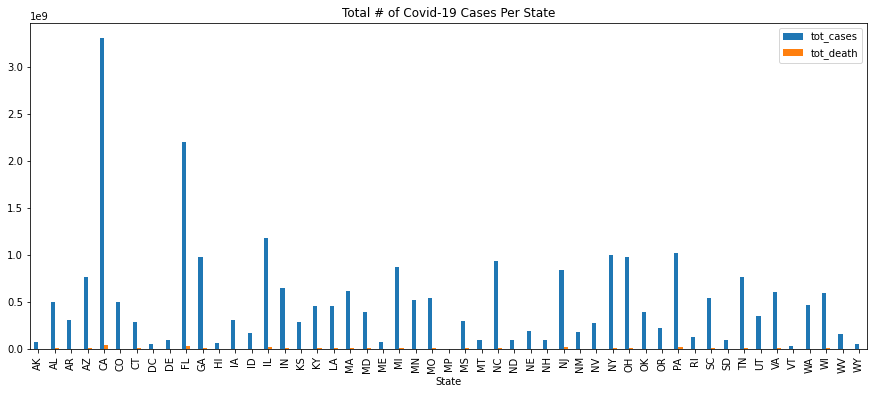

In [39]:
df3.plot(kind='bar' , x='State', y = ['tot_cases','tot_death'], title='Total # of Covid-19 Cases Per State', figsize= (15,6))
plt.savefig('Resources/Total_Number_Covis_Cases_per_state.png')

In [40]:
# Get the Covid and AMI merged file
df4 = pd.read_csv('Covid_AMI_Data_Merged.csv')
df4

,Unnamed: 0,Year,State,FIPS,18_or_Older_AMI_Total,Tot_Cases,Toth_Deaths
0,0,2017,Alabama,1,712000,0,0
1,1,2017,Alaska,2,94000,0,0
2,2,2017,Arizona,4,920000,0,0
3,3,2017,Arkansas,5,441000,0,0
4,4,2017,California,6,5241000,0,0
...,...,...,...,...,...,...,...
250,250,2021,Virginia,51,1199000,1133238,15601
251,251,2021,Washington,53,1360000,859170,9853
252,252,2021,West Virginia,54,347000,328162,5336
253,253,2021,Wisconsin,55,904000,1120669,11173


In [57]:
#Drop Unnamed column
df4.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [58]:
Edu_df = pd.read_excel('Education.xls')
Edu_df.head()

,"Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2020",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,"Sources: U.S. Census Bureau, 1970, 1980, 1990,...",NaN,NaN,NaN,NaN,NaN,NaN
1,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN
2,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN
3,Federal Information Processing Standards (FIPS...,State,Area name,"Less than a high school diploma, 2016-20","High school diploma only, 2016-20","Some college or associate's degree, 2016-20","Bachelor's degree or higher, 2016-20"
4,00000,US,United States,25562680,59421420,64496416,73356320


In [59]:
Edu_df.columns

Index(['Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2020',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

In [60]:
# Rename Columns
Edu_df.rename(columns= {'Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2020': 'FIPS', 'Unnamed: 1': 'State', 'Unnamed: 2': 'Area name', 'Unnamed: 3' : '<High School', 'Unnamed: 4': 'High School', 'Unnamed: 5' : 'Some college or associates degree', 'Unnamed: 6': 'Bachelors degree or higher'}, inplace = True)
Edu_df.head()

,FIPS,State,Area name,<High School,High School,Some college or associates degree,Bachelors degree or higher
0,"Sources: U.S. Census Bureau, 1970, 1980, 1990,...",NaN,NaN,NaN,NaN,NaN,NaN
1,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN
2,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN
3,Federal Information Processing Standards (FIPS...,State,Area name,"Less than a high school diploma, 2016-20","High school diploma only, 2016-20","Some college or associate's degree, 2016-20","Bachelor's degree or higher, 2016-20"
4,00000,US,United States,25562680,59421420,64496416,73356320


In [66]:
Edu_df.dropna().reset_index(drop=True)
Edu_df

,FIPS,State,Area name,<High School,High School,Some college or associates degree,Bachelors degree or higher
0,"Sources: U.S. Census Bureau, 1970, 1980, 1990,...",NaN,NaN,NaN,NaN,NaN,NaN
1,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN
2,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN
3,Federal Information Processing Standards (FIPS...,State,Area name,"Less than a high school diploma, 2016-20","High school diploma only, 2016-20","Some college or associate's degree, 2016-20","Bachelor's degree or higher, 2016-20"
4,00000,US,United States,25562680,59421420,64496416,73356320
...,...,...,...,...,...,...,...
3284,72145,PR,Vega Baja Municipio,9683,10459,8550,7948
3285,72147,PR,Vieques Municipio,1755,2726,735,782
3286,72149,PR,Villalba Municipio,3240,5624,3210,2970
3287,72151,PR,Yabucoa Municipio,6678,6140,6728,4186


In [67]:
#Add total numbers for education attainment per state
Less_than_High_sch = Edu_df.State.unique()
Less_than_High_sch

array([nan, 'State', 'US', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE',
       'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
       'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH',
       'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
       'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR'],
      dtype=object)

In [68]:
#Add total numbers for High school per state
x= ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
st_list = []
High_sch = Edu_df.groupby(['Area name']).sum().reset_index()
for state in x:
    st_list.append(High_sch.loc[High_sch['Area name']== state])
edu2 = pd.concat(st_list)
edu2.reset_index(drop=True, inplace=True)
edu2.head()


,Area name,FIPS,State,<High School,High School,Some college or associates degree,Bachelors degree or higher
0,Alaska,02000,AK,33176,137486,167807,144967
1,Alabama,01000,AL,438947,1014342,1013673,877044
2,Arkansas,05000,AR,260360,686812,596855,482695
3,Arizona,04000,AZ,587919,1151988,1637451,1468698
4,California,06000,CA,4286538,5431385,7690347,9256873


In [69]:
edu2.drop(['State'], axis = 1, inplace = True)
edu2.shape

(50, 6)

In [70]:
edu2.rename(columns = {'Area name': 'State'}, inplace = True)
edu2.head()

,State,FIPS,<High School,High School,Some college or associates degree,Bachelors degree or higher
0,Alaska,02000,33176,137486,167807,144967
1,Alabama,01000,438947,1014342,1013673,877044
2,Arkansas,05000,260360,686812,596855,482695
3,Arizona,04000,587919,1151988,1637451,1468698
4,California,06000,4286538,5431385,7690347,9256873


In [71]:
edu2['FIPS'] = edu2['FIPS'].astype(str).str[:-3].astype(np.int64)
edu2

,State,FIPS,<High School,High School,Some college or associates degree,Bachelors degree or higher
0,Alaska,2,33176,137486,167807,144967
1,Alabama,1,438947,1014342,1013673,877044
2,Arkansas,5,260360,686812,596855,482695
3,Arizona,4,587919,1151988,1637451,1468698
4,California,6,4286538,5431385,7690347,9256873
5,Colorado,8,308785,827081,1142035,1622853
6,Connecticut,9,225550,655381,612274,996000
7,Delaware,10,63843,210998,182986,222043
8,Florida,12,1751798,4308542,4535040,4659946
9,Georgia,13,848653,1925374,1969736,2252662


In [72]:
edu2.set_index(['FIPS'], inplace =True)
edu2.shape

(50, 5)

In [73]:
edu2 = edu2.sort_index()
edu2.head()

,State,<High School,High School,Some college or associates degree,Bachelors degree or higher
FIPS,,,,,
1,Alabama,438947,1014342,1013673,877044
2,Alaska,33176,137486,167807,144967
4,Arizona,587919,1151988,1637451,1468698
5,Arkansas,260360,686812,596855,482695
6,California,4286538,5431385,7690347,9256873


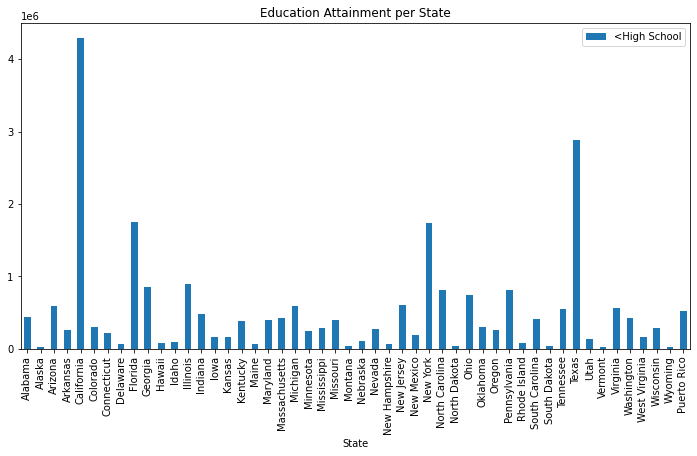

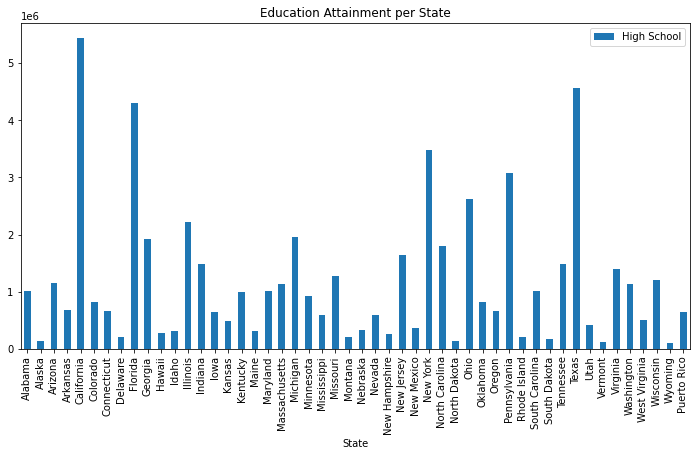

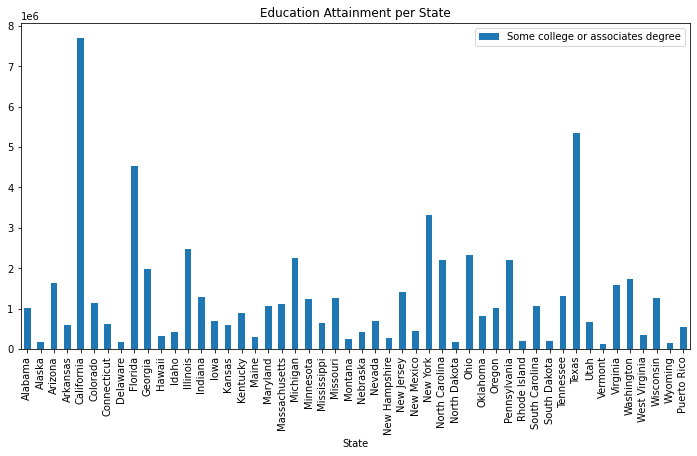

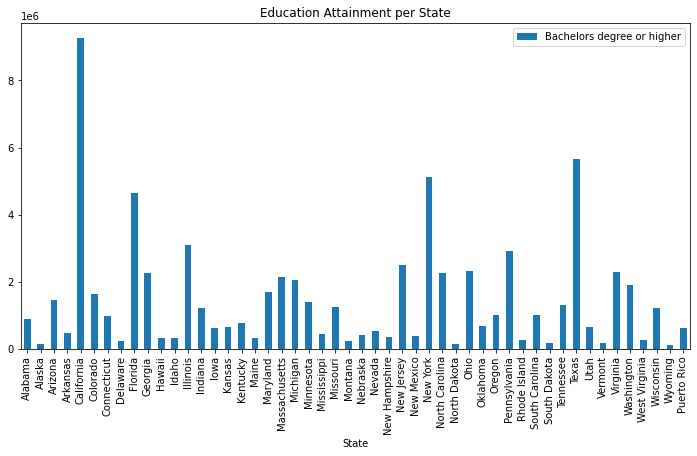

In [74]:
# plotting horizontal bar plots
from matplotlib.pyplot import xlabel
cols=['<High School', 'High School', 'Some college or associates degree', 'Bachelors degree or higher']
for col in cols:
    edu2.plot(kind='bar' , x='State', y = col, title='Education Attainment per State', figsize= (12,6))
    ylabel = 'Total Number'

plt.savefig('Resources/Education Attainment per State.png')



In [75]:
cols= edu2.columns.drop(['State'])
edu2[cols] =edu2[cols].apply(pd.to_numeric, errors='coerce').convert_dtypes() 
edu2.dtypes

State                                object
<High School                          Int64
High School                           Int64
Some college or associates degree     Int64
Bachelors degree or higher            Int64
dtype: object

In [76]:
# Save the file to Resources
edu2.to_csv('Resources/Education_cleaned.csv')

In [77]:
# Get the Covis and AMI combibed data
df4 = pd.read_csv("Covid_AMI_Data_Merged.csv")

In [81]:
# Merge EDucation data with Covid and AMI data
edu_ami_df = pd.merge(df4,edu2)
edu_ami_df

,Unnamed: 0,Year,State,FIPS,18_or_Older_AMI_Total,Tot_Cases,Toth_Deaths,<High School,High School,Some college or associates degree,Bachelors degree or higher
0,0,2017,Alabama,1,712000,0,0,438947,1014342,1013673,877044
1,51,2018,Alabama,1,217000,0,0,438947,1014342,1013673,877044
2,102,2019,Alabama,1,680000,0,0,438947,1014342,1013673,877044
3,153,2020,Alabama,1,794000,362015,7189,438947,1014342,1013673,877044
4,204,2021,Alabama,1,794000,904526,16747,438947,1014342,1013673,877044
...,...,...,...,...,...,...,...,...,...,...,...
234,254,2021,Wyoming,56,98000,115638,1526,25201,112183,144736,110699
235,185,2020,New York,36,2802000,548154,12566,1743890,3474389,3318086,5112792
236,236,2021,New York,36,2972000,1924606,23611,1743890,3474389,3318086,5112792
237,199,2020,Virginia,51,1115000,354767,5081,563601,1392823,1571035,2304490


In [82]:
# Drop Unnamed column
edu_ami_df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [83]:
edu_ami_df.to_csv('Resources/Education_merged.csv')

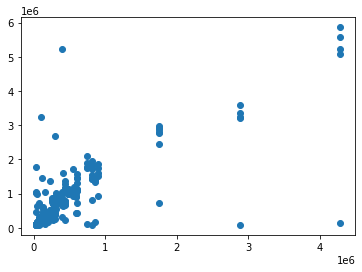

In [85]:
# Plot a scatter graph 
x = edu_ami_df['<High School']
y = edu_ami_df['18_or_Older_AMI_Total']
plt.scatter(edu_ami_df['<High School'], edu_ami_df['18_or_Older_AMI_Total'])
plt.show()

In [87]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [88]:
edu_ami_df['<High School'].astype(float).corr(edu_ami_df['18_or_Older_AMI_Total'])

0.7529930900419427

In [90]:
# assign x and y values for linear regression.
x_values = edu_ami_df['<High School']
y_values = edu_ami_df['18_or_Older_AMI_Total']

# Perform linear regression.Plota
(slope, intercept, r_value, p_value, std_err) = linregress(x_values.astype(float), y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is : {r_value:.3f}")
  



y = 0.97x + 404022.43
The p-value is: 0.000
The r-value is : 0.753


In [91]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(x_value * slope + intercept) for x_value in x_values ]


In [92]:
x_values.tolist()

[438947,
 438947,
 438947,
 438947,
 438947,
 33176,
 33176,
 33176,
 33176,
 33176,
 587919,
 587919,
 587919,
 587919,
 587919,
 260360,
 260360,
 260360,
 260360,
 260360,
 4286538,
 4286538,
 4286538,
 4286538,
 4286538,
 308785,
 308785,
 308785,
 308785,
 308785,
 225550,
 225550,
 225550,
 225550,
 225550,
 63843,
 63843,
 63843,
 63843,
 63843,
 1751798,
 1751798,
 1751798,
 1751798,
 1751798,
 848653,
 848653,
 848653,
 848653,
 848653,
 74875,
 74875,
 74875,
 74875,
 74875,
 100189,
 100189,
 100189,
 100189,
 100189,
 898338,
 898338,
 898338,
 898338,
 898338,
 476425,
 476425,
 476425,
 476425,
 476425,
 158401,
 158401,
 158401,
 158401,
 158401,
 165373,
 165373,
 165373,
 165373,
 165373,
 389642,
 389642,
 389642,
 389642,
 389642,
 66525,
 66525,
 66525,
 66525,
 66525,
 393028,
 393028,
 393028,
 393028,
 393028,
 429794,
 429794,
 429794,
 429794,
 429794,
 596313,
 596313,
 596313,
 596313,
 596313,
 252331,
 252331,
 252331,
 252331,
 252331,
 291035,
 291035,
 2

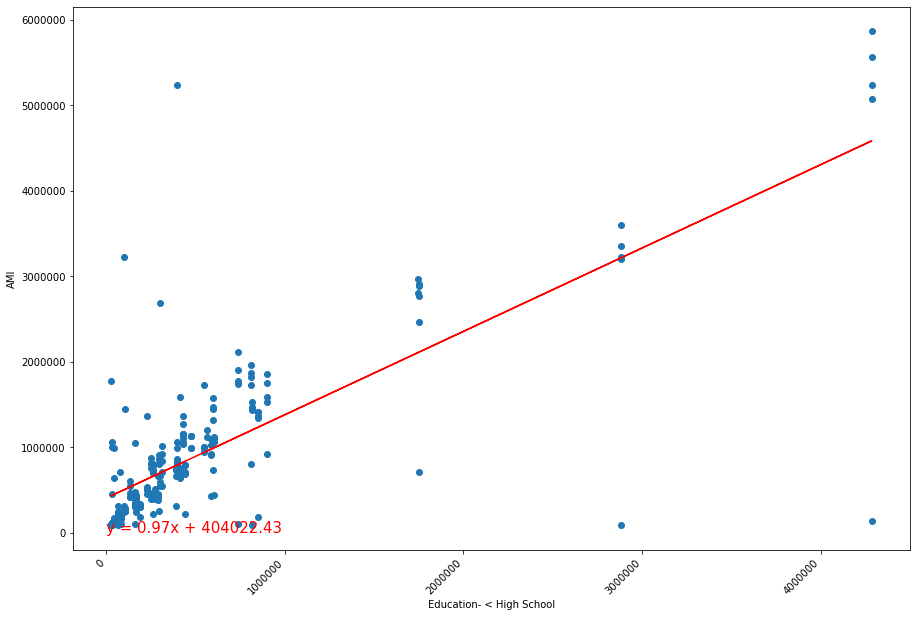

In [101]:
#Import Matplotlib
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.figure(figsize = (15,10))
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values.tolist(),regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (200,500), fontsize=15, color="red")
plt.xlabel('Education- < High School')
plt.ylabel('AMI')
plt.xticks (rotation = 45, ha = 'right')
plt.ticklabel_format(style='plain')
plt.savefig("Resources/Education- < High School.png")
plt.show()

In [105]:
# Get the income and employment data
income_df = pd.read_excel("Unemployment .xlsx")
income_df.columns

Index(['FIPS_code', 'State', 'Area_name', 'Civilian_labor_force_2017',
       'Employed_2017', 'Unemployed_2017', 'Unemployment_rate_2017',
       'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
       'Unemployment_rate_2018', 'Civilian_labor_force_2019', 'Employed_2019',
       'Unemployed_2019', 'Unemployment_rate_2019',
       'Civilian_labor_force_2020', 'Employed_2020', 'Unemployed_2020',
       'Unemployment_rate_2020', 'Civilian_labor_force_2021', 'Employed_2021',
       'Unemployed_2021', 'Unemployment_rate_2021',
       'Median_Household_Income_2020',
       'Med_HH_Income_Percent_of_State_Total_2020', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnam

In [106]:
# Drop unnecessary columns from DataFrame
income_df.drop(['Civilian_labor_force_2017', 'Unemployment_rate_2017', 'Civilian_labor_force_2018', 'Unemployment_rate_2018', 'Civilian_labor_force_2019', 'Unemployment_rate_2019', 'Civilian_labor_force_2020', 'Unemployment_rate_2020', 'Civilian_labor_force_2021', 'Unemployment_rate_2021', 'Med_HH_Income_Percent_of_State_Total_2020', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65',
       'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68', 'Unnamed: 69',
       'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72', 'Unnamed: 73',
       'Unnamed: 74', 'Unnamed: 75', 'Unnamed: 76', 'Unnamed: 77',
       'Unnamed: 78', 'Unnamed: 79', 'Unnamed: 80', 'Unnamed: 81',
       'Unnamed: 82', 'Unnamed: 83', 'Unnamed: 84', 'Unnamed: 85',
       'Unnamed: 86', 'Unnamed: 87', 'Unnamed: 88', 'Unnamed: 89',
       'Unnamed: 90', 'Unnamed: 91', 'Unnamed: 92', 'Unnamed: 93',
       'Unnamed: 94'], axis = 1, inplace = True)
income_df.columns

Index(['FIPS_code', 'State', 'Area_name', 'Employed_2017', 'Unemployed_2017',
       'Employed_2018', 'Unemployed_2018', 'Employed_2019', 'Unemployed_2019',
       'Employed_2020', 'Unemployed_2020', 'Employed_2021', 'Unemployed_2021',
       'Median_Household_Income_2020'],
      dtype='object')

In [107]:
# Combine each state data from county level to state level
x= ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
st_list = []
income_median_2020 = income_df.groupby(['Area_name']).sum().reset_index()
for state in x:
    st_list.append(income_median_2020.loc[income_median_2020['Area_name']== state])
med_inc = pd.concat(st_list)
med_inc.reset_index(drop=True, inplace=True)
med_inc.head()

,Area_name,FIPS_code,Employed_2017,Unemployed_2017,Employed_2018,Unemployed_2018,Employed_2019,Unemployed_2019,Employed_2020,Unemployed_2020,Employed_2021,Unemployed_2021,Median_Household_Income_2020
0,Alaska,2000,337108.0,23481.0,334241.0,21211.0,333541.0,19342.0,318279.0,28604.0,332266.0,22670.0,79961.0
1,Alabama,1000,2103873.0,99585.0,2153080.0,87397.0,2199868.0,72024.0,2121149.0,147160.0,2169721.0,77272.0,53958.0
2,Arkansas,5000,1297854.0,50234.0,1302629.0,49057.0,1318465.0,47325.0,1274070.0,82509.0,1278984.0,53636.0,51146.0
3,Arizona,4000,3079700.0,160411.0,3168469.0,159720.0,3265925.0,166551.0,3191100.0,265752.0,3346319.0,172106.0,64652.0
4,California,6000,18258064.0,927302.0,18468143.0,821364.0,18612607.0,796806.0,16996666.0,1934450.0,17541944.0,1381250.0,83001.0


In [108]:
# Rename the columns
med_inc.rename(columns = {'Area_name': 'State', 'FIPS_code': 'FIPS'}, inplace = True)
med_inc.head()

,State,FIPS,Employed_2017,Unemployed_2017,Employed_2018,Unemployed_2018,Employed_2019,Unemployed_2019,Employed_2020,Unemployed_2020,Employed_2021,Unemployed_2021,Median_Household_Income_2020
0,Alaska,2000,337108.0,23481.0,334241.0,21211.0,333541.0,19342.0,318279.0,28604.0,332266.0,22670.0,79961.0
1,Alabama,1000,2103873.0,99585.0,2153080.0,87397.0,2199868.0,72024.0,2121149.0,147160.0,2169721.0,77272.0,53958.0
2,Arkansas,5000,1297854.0,50234.0,1302629.0,49057.0,1318465.0,47325.0,1274070.0,82509.0,1278984.0,53636.0,51146.0
3,Arizona,4000,3079700.0,160411.0,3168469.0,159720.0,3265925.0,166551.0,3191100.0,265752.0,3346319.0,172106.0,64652.0
4,California,6000,18258064.0,927302.0,18468143.0,821364.0,18612607.0,796806.0,16996666.0,1934450.0,17541944.0,1381250.0,83001.0


In [109]:
# Make the county zip FIPS code to state FIPS
med_inc['FIPS'] = med_inc['FIPS'].astype(str).str[:-3].astype(np.int64)
med_inc

,State,FIPS,Employed_2017,Unemployed_2017,Employed_2018,Unemployed_2018,Employed_2019,Unemployed_2019,Employed_2020,Unemployed_2020,Employed_2021,Unemployed_2021,Median_Household_Income_2020
0,Alaska,2,337108.0,23481.0,334241.0,21211.0,333541.0,19342.0,318279.0,28604.0,332266.0,22670.0,79961.0
1,Alabama,1,2103873.0,99585.0,2153080.0,87397.0,2199868.0,72024.0,2121149.0,147160.0,2169721.0,77272.0,53958.0
2,Arkansas,5,1297854.0,50234.0,1302629.0,49057.0,1318465.0,47325.0,1274070.0,82509.0,1278984.0,53636.0,51146.0
3,Arizona,4,3079700.0,160411.0,3168469.0,159720.0,3265925.0,166551.0,3191100.0,265752.0,3346319.0,172106.0,64652.0
4,California,6,18258064.0,927302.0,18468143.0,821364.0,18612607.0,796806.0,16996666.0,1934450.0,17541944.0,1381250.0,83001.0
5,Colorado,8,2885980.0,77810.0,2957690.0,91950.0,3019934.0,80664.0,2874857.0,212414.0,2986711.0,169399.0,77688.0
6,Connecticut,9,1838833.0,84878.0,1855969.0,75526.0,1881688.0,68661.0,1749954.0,147828.0,1739815.0,116108.0,79723.0
7,Delaware,10,453949.0,21265.0,462143.0,18011.0,466856.0,17989.0,449114.0,36699.0,469875.0,26555.0,71335.0
8,Florida,12,9544892.0,428098.0,9734029.0,373162.0,9928235.0,330963.0,9267151.0,827727.0,9843057.0,469711.0,61724.0
9,Georgia,13,4864813.0,243076.0,4915713.0,205459.0,4967503.0,185441.0,4751105.0,328450.0,4983732.0,203237.0,62800.0


In [110]:
med_inc.set_index(['FIPS'], inplace =True)
med_inc.head()

,State,Employed_2017,Unemployed_2017,Employed_2018,Unemployed_2018,Employed_2019,Unemployed_2019,Employed_2020,Unemployed_2020,Employed_2021,Unemployed_2021,Median_Household_Income_2020
FIPS,,,,,,,,,,,,
2,Alaska,337108.0,23481.0,334241.0,21211.0,333541.0,19342.0,318279.0,28604.0,332266.0,22670.0,79961.0
1,Alabama,2103873.0,99585.0,2153080.0,87397.0,2199868.0,72024.0,2121149.0,147160.0,2169721.0,77272.0,53958.0
5,Arkansas,1297854.0,50234.0,1302629.0,49057.0,1318465.0,47325.0,1274070.0,82509.0,1278984.0,53636.0,51146.0
4,Arizona,3079700.0,160411.0,3168469.0,159720.0,3265925.0,166551.0,3191100.0,265752.0,3346319.0,172106.0,64652.0
6,California,18258064.0,927302.0,18468143.0,821364.0,18612607.0,796806.0,16996666.0,1934450.0,17541944.0,1381250.0,83001.0


In [111]:
med_inc = med_inc.sort_index()
med_inc.head()

,State,Employed_2017,Unemployed_2017,Employed_2018,Unemployed_2018,Employed_2019,Unemployed_2019,Employed_2020,Unemployed_2020,Employed_2021,Unemployed_2021,Median_Household_Income_2020
FIPS,,,,,,,,,,,,
1,Alabama,2103873.0,99585.0,2153080.0,87397.0,2199868.0,72024.0,2121149.0,147160.0,2169721.0,77272.0,53958.0
2,Alaska,337108.0,23481.0,334241.0,21211.0,333541.0,19342.0,318279.0,28604.0,332266.0,22670.0,79961.0
4,Arizona,3079700.0,160411.0,3168469.0,159720.0,3265925.0,166551.0,3191100.0,265752.0,3346319.0,172106.0,64652.0
5,Arkansas,1297854.0,50234.0,1302629.0,49057.0,1318465.0,47325.0,1274070.0,82509.0,1278984.0,53636.0,51146.0
6,California,18258064.0,927302.0,18468143.0,821364.0,18612607.0,796806.0,16996666.0,1934450.0,17541944.0,1381250.0,83001.0


In [112]:
# Change the data types
cols= med_inc.columns.drop(['State'])
med_inc[cols] =med_inc[cols].apply(pd.to_numeric, errors='coerce').convert_dtypes() 
med_inc.dtypes

State                           object
Employed_2017                    Int64
Unemployed_2017                  Int64
Employed_2018                    Int64
Unemployed_2018                  Int64
Employed_2019                    Int64
Unemployed_2019                  Int64
Employed_2020                    Int64
Unemployed_2020                  Int64
Employed_2021                    Int64
Unemployed_2021                  Int64
Median_Household_Income_2020     Int64
dtype: object

In [113]:
med_inc.shape

(51, 12)

In [ ]:
# Save the cleaned file as csv
med_inc.to_csv('Resources/med_inc.csv')
med_inc.shape

(51, 16)

In [117]:
# Merge income data with covid, ami and education data
Ami_edu_inc_cov_df = pd.merge(edu_ami_df, med_inc)
Ami_edu_inc_cov_df.head()

,Year,State,FIPS,18_or_Older_AMI_Total,Tot_Cases,Toth_Deaths,<High School,High School,Some college or associates degree,Bachelors degree or higher,...,Unemployed_2017,Employed_2018,Unemployed_2018,Employed_2019,Unemployed_2019,Employed_2020,Unemployed_2020,Employed_2021,Unemployed_2021,Median_Household_Income_2020
0,2017,Alabama,1,712000,0,0,438947,1014342,1013673,877044,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
1,2018,Alabama,1,217000,0,0,438947,1014342,1013673,877044,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
2,2019,Alabama,1,680000,0,0,438947,1014342,1013673,877044,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
3,2020,Alabama,1,794000,362015,7189,438947,1014342,1013673,877044,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
4,2021,Alabama,1,794000,904526,16747,438947,1014342,1013673,877044,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958


In [125]:
Ami_edu_inc_cov_df.to_csv('Resources/all_data_merged.csv')

In [126]:
# Check our data stats
Ami_edu_inc_cov_df.describe()

,Year,FIPS,18_or_Older_AMI_Total,Tot_Cases,Toth_Deaths,<High School,High School,Some college or associates degree,Bachelors degree or higher,Employed_2017,Unemployed_2017,Employed_2018,Unemployed_2018,Employed_2019,Unemployed_2019,Employed_2020,Unemployed_2020,Employed_2021,Unemployed_2021,Median_Household_Income_2020
count,239.000000,239.000000,2.390000e+02,2.390000e+02,239.000000,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,239.000000,2.390000e+02,239.000000,2.390000e+02,239.000000,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,239.000000
mean,2019.025105,29.117155,8.872301e+05,2.986770e+05,4587.389121,4.956736e+05,1.158439e+06,1.268089e+06,1.418942e+06,2.996416e+06,135970.937238,3.036101e+06,122785.878661,3.077726e+06,116945.012552,2.893407e+06,2.528119e+05,2.992917e+06,1.679340e+05,66696.217573
std,1.419920,15.771840,9.642845e+05,6.858631e+05,10436.717487,7.448316e+05,1.183458e+06,1.413638e+06,1.665330e+06,3.363457e+06,167271.088011,3.410404e+06,148674.929109,3.450454e+06,141125.842222,3.196669e+06,3.338335e+05,3.322260e+06,2.352285e+05,10767.622180
min,2017.000000,1.000000,8.300000e+04,0.000000e+00,0.000000,2.520100e+04,1.121830e+05,1.131120e+05,1.106990e+05,2.811640e+05,10687.000000,2.809090e+05,9331.000000,2.833770e+05,8350.000000,2.767390e+05,1.698300e+04,2.773720e+05,1.127500e+04,47368.000000
25%,2018.000000,16.500000,2.540000e+05,0.000000e+00,0.000000,1.031865e+05,3.157775e+05,3.746805e+05,3.495870e+05,7.783305e+05,28662.000000,7.951200e+05,27476.000000,8.101740e+05,29123.000000,7.839580e+05,5.799800e+04,8.142305e+05,3.547700e+04,59380.500000
50%,2019.000000,29.000000,6.770000e+05,0.000000e+00,0.000000,2.910350e+05,8.126180e+05,8.953210e+05,8.770440e+05,1.955234e+06,84179.000000,1.968398e+06,77054.000000,1.986171e+06,69600.000000,1.886999e+06,1.471600e+05,1.941737e+06,9.520500e+04,64608.000000
75%,2020.000000,42.000000,1.102500e+06,3.184060e+05,4837.500000,5.477330e+05,1.479648e+06,1.405825e+06,1.907238e+06,3.554754e+06,160411.000000,3.644274e+06,159720.000000,3.714547e+06,158533.000000,3.390249e+06,3.284500e+05,3.535478e+06,2.032370e+05,75489.000000
max,2021.000000,56.000000,5.864000e+06,5.477529e+06,75847.000000,4.286538e+06,5.431385e+06,7.690347e+06,9.256873e+06,1.825806e+07,927302.000000,1.846814e+07,821364.000000,1.861261e+07,796806.000000,1.699667e+07,1.934450e+06,1.754194e+07,1.381250e+06,88589.000000
